# SciPy Minimize

## One Dimensional Methods

In [1]:
# Importing the packages for the example
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Test Functions')

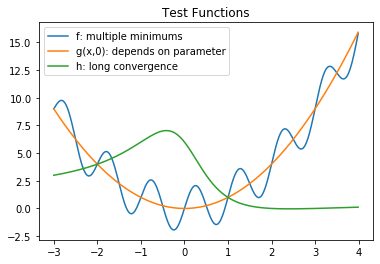

In [2]:
# An example function with many parameters
f = lambda x: ( x**2 + 2* np.sin(2*np.pi*x) )

# A function that uses a parameter
g = lambda x , a : (x-a)**2  

# A function that takes longer to converge
h = lambda x : (x**2 - 5*x + 6)/(x**2 + 1)

x=np.arange(-3,4,.01)
plt.plot(x,f(x),label="f: multiple minimums") 
plt.plot(x,g(x,0),label="g(x,0): depends on parameter")
plt.plot(x,h(x),label="h: long convergence")
plt.legend()
plt.title("Test Functions")

### Basic Usage and Result

In [3]:
result=optimize.minimize_scalar(f)
print(result)

     fun: -1.9390442217474881
    nfev: 15
     nit: 11
 success: True
       x: -0.24382235612367698


The function returns a special variable type based on a dictionary that can store more information. Individual components can be accessed by:

In [4]:
result.x

-0.24382235612367698

Availible components can be determined by calling:

In [5]:
result.keys()

dict_keys(['fun', 'x', 'nit', 'nfev', 'success'])

### Choosing Methods

SciPy Optimize comes with three 1D methods

* Brent
* Golden
* Bounded

<b>Brent</b>'s method is the default, and it uses inverse quadratic interpolation. 

Both Brent's method and the Golden Method both rely on <i>brackets</i> or a set of three   numbers `a`,`b`,`c` such that `f(b)` is less than both `f(a)` and `f(c)`.  

The bounded method instead uses <i>bounds</i>, which only has the two endpoints.  While brackets are optional for Brent's and Golden, initial bounds are required to start the Bounded Method.

I include time profiling of the three methods, and you can see that even for a simple, straightforward function, Brent's method runs much faster with fewer iterations and function evaluations.

In [132]:
%timeit optimize.minimize_scalar(f,method='Brent')
optimize.minimize_scalar(f,method='Brent')

125 µs ± 4.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


     fun: -1.9390442217474881
    nfev: 15
     nit: 11
 success: True
       x: -0.24382235612367698

In [133]:
%timeit optimize.minimize_scalar(f,method='golden')
optimize.minimize_scalar(f,method='golden')

140 µs ± 2.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


     fun: -1.9390442217474881
    nfev: 46
     nit: 41
 success: True
       x: -0.2438223579554442

In [134]:
%timeit optimize.minimize_scalar(f,method='bounded',bounds=[-1,1])
optimize.minimize_scalar(f,method='bounded',bounds=[-1,1])

206 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


     fun: -1.9390442216809054
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: -0.24382363945219096

### Bracketing

In [55]:
# Use a bracket to choose which local minimum 
optimize.minimize_scalar(f,bracket=[0.25,1,2])

     fun: -1.4514116620602204
    nfev: 14
     nit: 10
 success: True
       x: 0.7314305452922458

### Flags 

The `args` variable flag passes additional parameters to the function.  

In [113]:
# 2 passes to g, controlling the minimum location
# minimizing g(x,2)
optimize.minimize_scalar(g, args=(2))

     fun: 4.930380657631324e-32
    nfev: 9
     nit: 4
 success: True
       x: 1.9999999999999998

### Options

The maximum number of iterations `maxiter` or tolerance for x difference between successive steps `xtol` can be passed in a dictionary to the flag `options`.  

While most 1D functions converge in a trivial amount of time, sometimes you may want manual control to avoid excessive resources or your problem requires extreme accuracy.

In [114]:
# The simple case
optimize.minimize_scalar(h)

     fun: -0.0355339059327378
    nfev: 19
     nit: 13
 success: True
       x: 2.4142135621371947

In [115]:
# Simple example to change maxiter
optimize.minimize_scalar(h,options={'maxiter':4})

     fun: -0.03526620646182484
    nfev: 10
     nit: 4
 success: False
       x: 2.4568626637256976

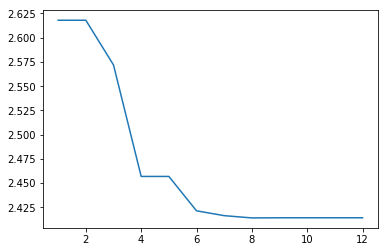

In [123]:
n=np.arange(1,13)
x_n=np.zeros(12)
for ii in n:
    result=optimize.minimize_scalar(h,options={'maxiter':ii})
    x_n[ii-1]=result.x

plt.plot(n,x_n)

In [105]:
optimize.minimize_scalar(h,options={'xtol':.1})

     fun: -0.03500252864128803
    nfev: 9
     nit: 3
 success: True
       x: 2.35623059999